# Ch2: 2.2.5 Independent Component Analysis (ICA)


## Adopted From https://notebook.community/riddhishb/ipython-notebooks/Cocktail%20Party%20Problem/.ipynb_checkpoints/PCA_ICA_FOBI-checkpoint  Written By: **Shashwat Shukla and Dhruv Ilesh Shah**



In [4]:
def FOBI_ICA (xn): # The Fourth Order Blind Identification(FOBI) ICA is implemented here.
   # Perform FOBI.
    norm_xn = LA.norm(xn, axis=0)
    norm = [norm_xn, norm_xn]

    cov2 = np.cov(np.multiply(norm, xn))

    d_n, Y = LA.eigh(cov2)

    source = np.dot(np.transpose(Y), xn)
    return source

def whitenData (x):
    # Calculate the covariance matrix of the initial data.
    cov = np.cov(x)
    # Calculate eigenvalues and eigenvectors of the covariance matrix.
    d, E = LA.eigh(cov)
    # Generate a diagonal matrix with the eigenvalues as diagonal elements.
    D = np.diag(d)
    # Calculate the singular values as square root of eigenvalues
    Di = LA.sqrtm(LA.inv(D))
    # Perform whitening. xn is the whitened matrix.
    xn = np.dot(Di, np.dot(np.transpose(E), x))
    return xn


## The Cocktail Party Problem(CPP) solved via Independent Component Analysis.


![Cocktail Party Problem](data/cocktail_1.png)

## two microphones and two speakers, each microphone receive a different mix from the two speakers/sounds

Sampling rate =  8000
Data type is  uint8
Number of samples:  50000


Text(0.5, 1.0, 'Whitened data')

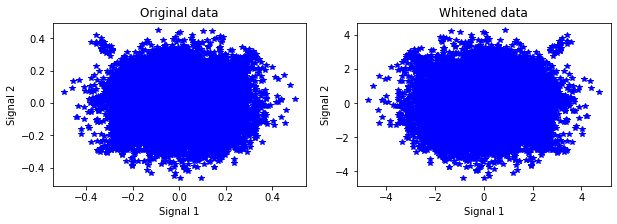

In [5]:

# Import packages.
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('data/mix1.wav')
print ("Sampling rate = ", samplingRate)
print ("Data type is ", signal1.dtype)

# Convert the signal so that amplitude lies between 0 and 1.
signal1 = signal1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# Output information about the sound samples.
a = signal1.shape
n = a[0]
print ("Number of samples: ", n)
n = n * 1.0

# Input data from the first receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('data/mix2.wav')
signal2 = signal2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# x is our initial data matrix.
x = [signal1, signal2]

# Plot the signals from both sources to show correlations in the data.
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Original data")
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')

xn = whitenData (x)

# Plot whitened data to show new structure of the data.
plt.subplot(1,2,2)
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")


Text(0.5, 1.0, 'Original signal 2')

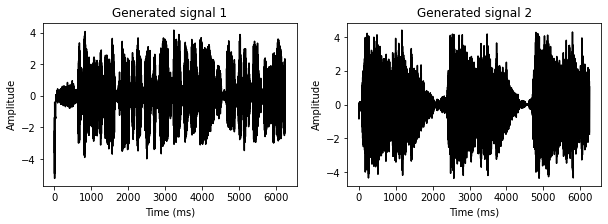

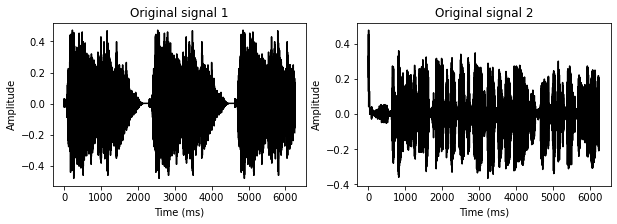

In [6]:
source = FOBI_ICA(xn)
# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.subplot(1,2,2)
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

# Plot the actual sources for comparison.
samplingRate, orig1 = wavfile.read('data/source1.wav')
orig1 = orig1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('data/source2.wav')
orig2 = orig2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(1,2,2)
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")

## obviously the reconstructed signals are swapped original sognals, which is a feature in ICA and many decomposition algorithms 

#  Mixed Images Separation performed via Independent Component Analysis.

Number of samples:  640000


Text(0.5, 1.0, 'Whitened data')

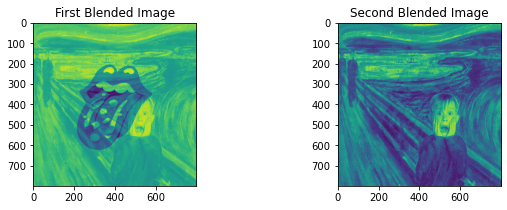

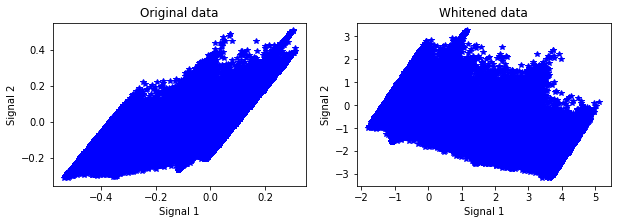

In [7]:
# Import packages.
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA
import cv2

# Import the images
im1 = cv2.imread("data/blend1.png", 0)
im2 = cv2.imread("data/blend2.png", 0)

fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.title("First Blended Image")
plt.imshow(im1)
plt.subplot(1,2,2)
plt.title("Second Blended Image")
plt.imshow(im2)

# Generate linear signals out of these
im1 = np.reshape(im1, np.size(im1))
im2 = np.reshape(im2, np.size(im2))

# uint8 takes values from 0 to 255
im1 = im1 / 255.0
im1 = im1 - np.mean(im1)
im2 = im2 / 255.0
im2 = im2 - np.mean(im2)

# Output information about the image dimensions.
a = im1.shape
n = a[0]
print ("Number of samples: ", n)
n = n * 1.0

time = np.arange(0, n, 1)

# x is our initial data matrix.
x = [im1, im2]

# Plot the signals from both sources to show correlations in the data.
fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

xn = whitenData (x)

# Plot whitened data to show new structure of the data.
plt.subplot(1,2,2)
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

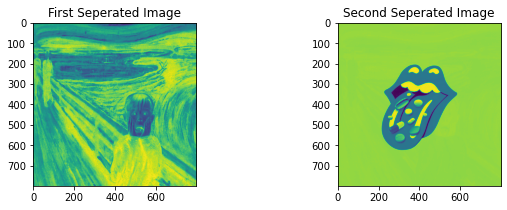

In [8]:


source = FOBI_ICA(xn)

out1 = 10 * np.reshape(source[0], (800, 800))
out2 = 10 * np.reshape(source[1], (800, 800))

fig = plt.figure( figsize=(10,3))
plt.subplot(1,2,1)
plt.title("First Seperated Image")
plt.imshow(out1)
plt.subplot(1,2,2)
plt.title("Second Seperated Image")
plt.imshow(out2)
